In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [77]:
df = pd.read_csv('snsdata1.csv')

In [78]:
df

,grad year,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,2006,F,18.240,28,0,0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4562,2006,F,18.628,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4563,2006,F,18.987,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4564,2006,F,18.861,46,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df.columns

Index(['grad year', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [80]:
df.duplicated().sum()

130

In [81]:
df.drop_duplicates(inplace=True)

In [82]:
df.duplicated().sum()

0

In [83]:
df.isnull().sum()

grad year         0
gender          332
age             602
friends           0
basketball        0
football          0
soccer            0
softball          0
volleyball        0
swimming          0
cheerleading      0
baseball          0
tennis            0
sports            0
cute              0
sex               0
sexy              0
hot               0
kissed            0
dance             0
band              0
marching          0
music             0
rock              0
god               0
church            0
jesus             0
bible             0
hair              0
dress             0
blonde            0
mall              0
shopping          0
clothes           0
hollister         0
abercrombie       0
die               0
death             0
drunk             0
drugs             0
dtype: int64

In [84]:
df['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [85]:
df['gender'].fillna(value=df['gender'].mode()[0], inplace=True)

In [86]:
df['gender'].isnull().sum()

0

In [87]:
df['age'].mean()

19.150054251434533

In [88]:
df['age'].median()

18.678

In [89]:
df['age'].fillna(value=df['age'].mean(), inplace=True)

In [90]:
df['age'].isnull().sum()

0

In [91]:
df.isnull().sum()

grad year       0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

In [92]:
def outliers(x):
    y = x.select_dtypes(include=[int, float])
    for i in y:
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()

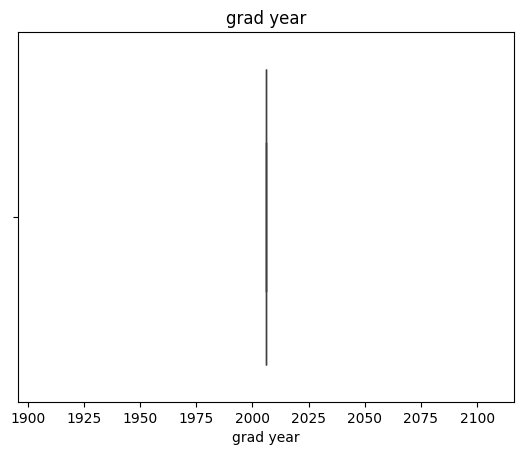

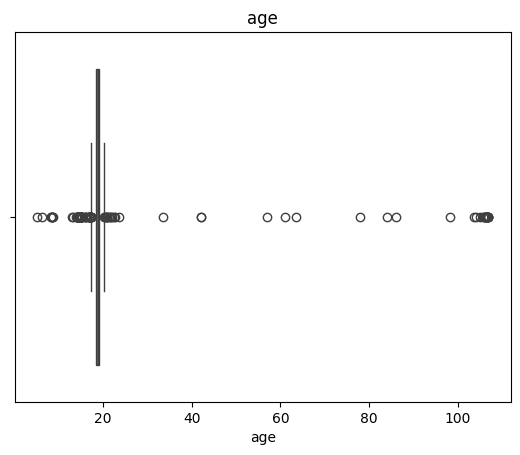

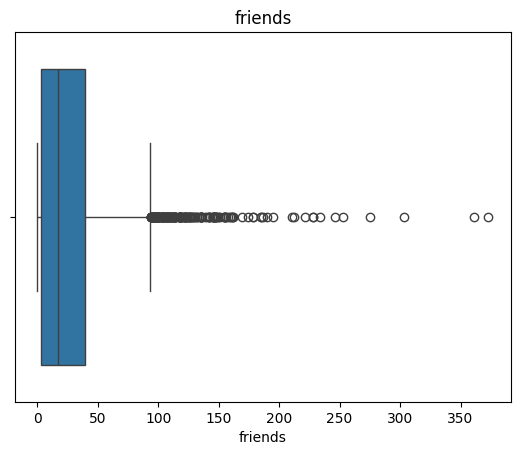

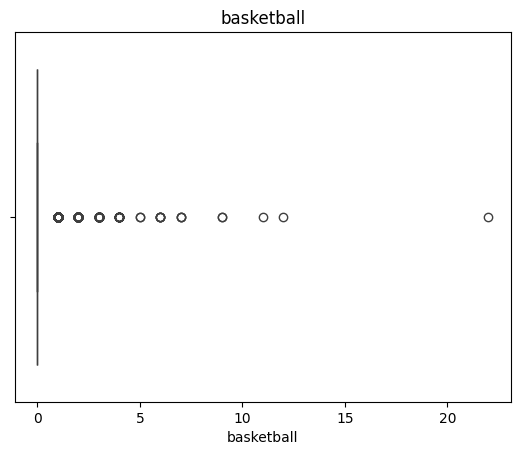

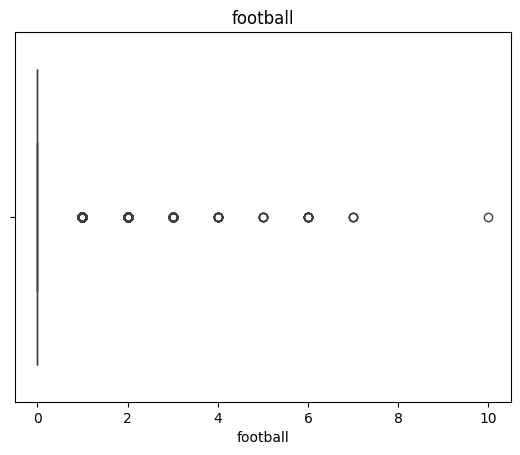

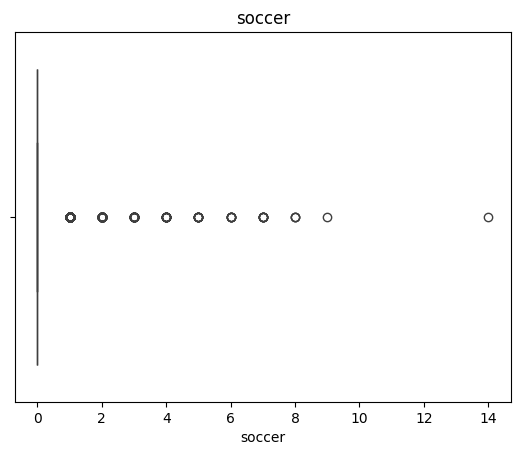

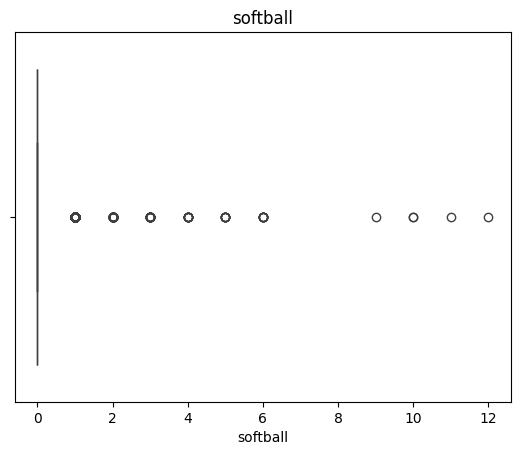

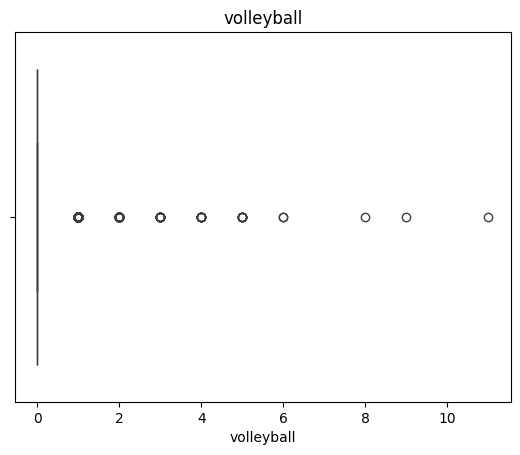

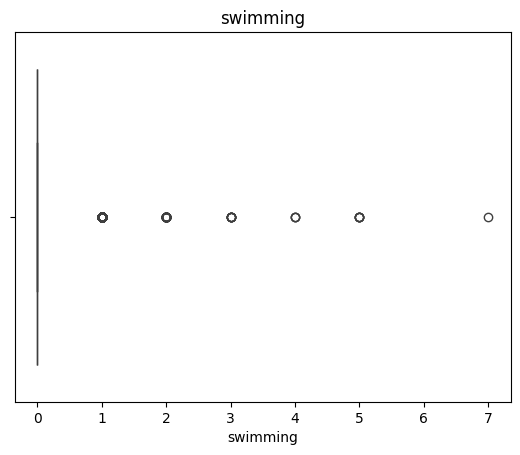

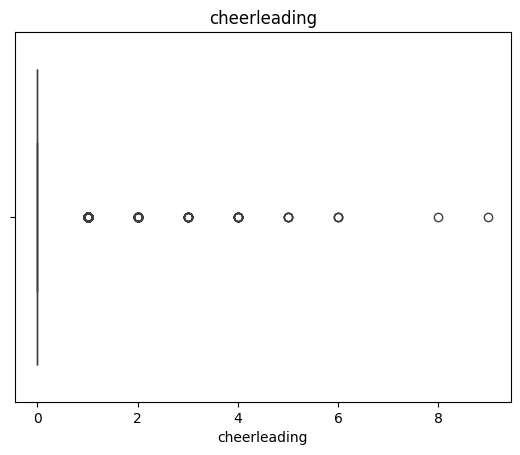

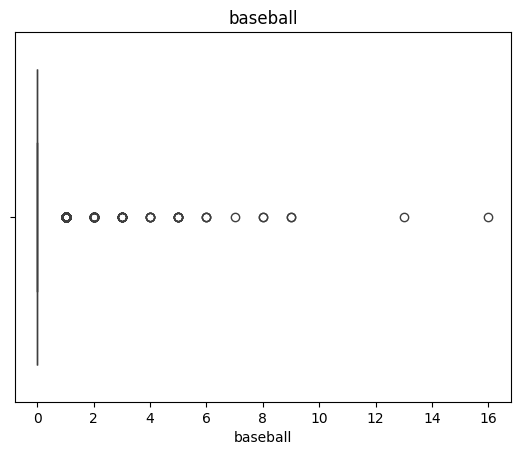

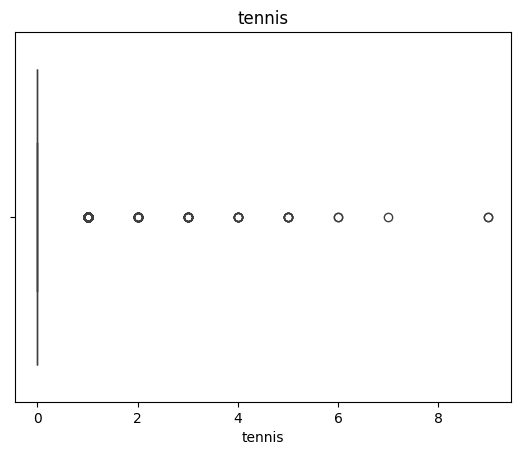

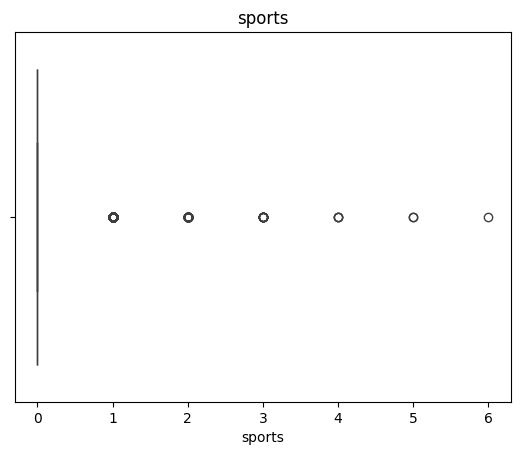

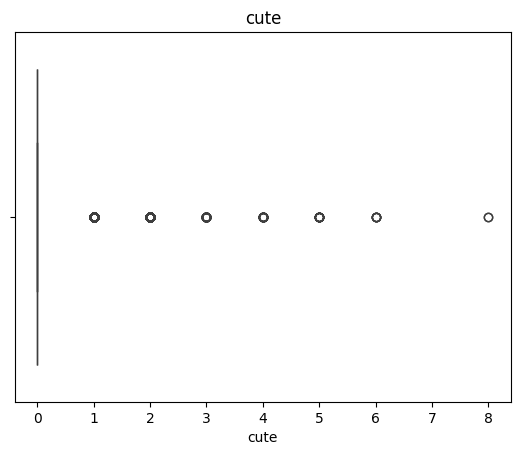

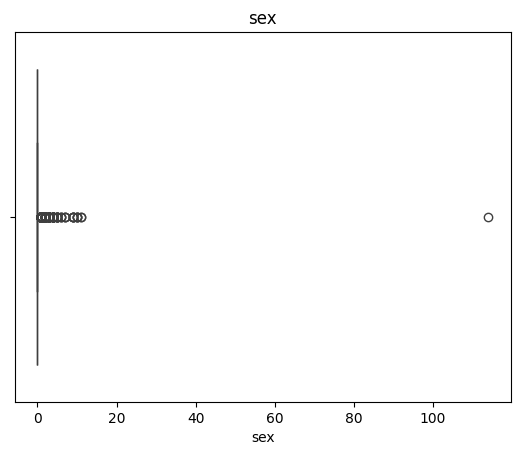

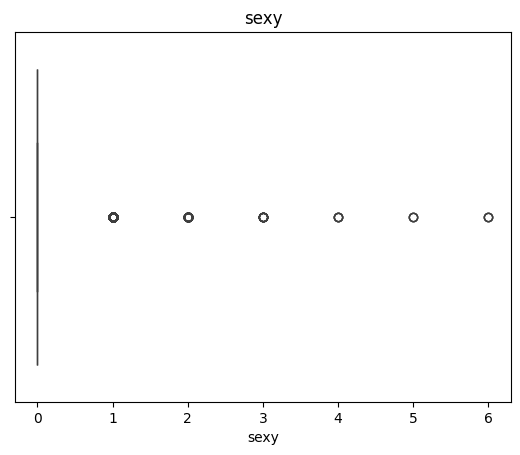

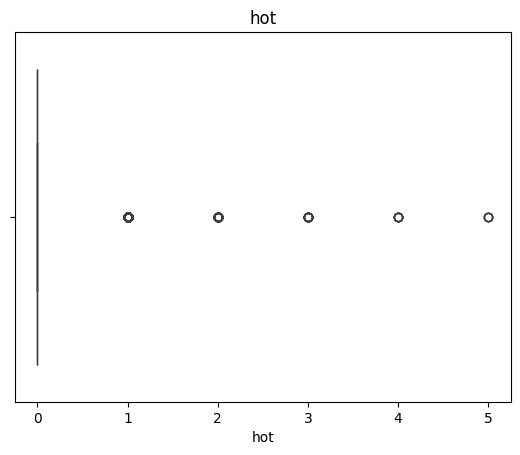

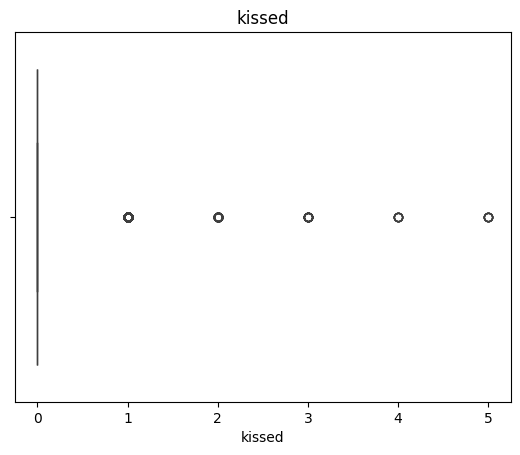

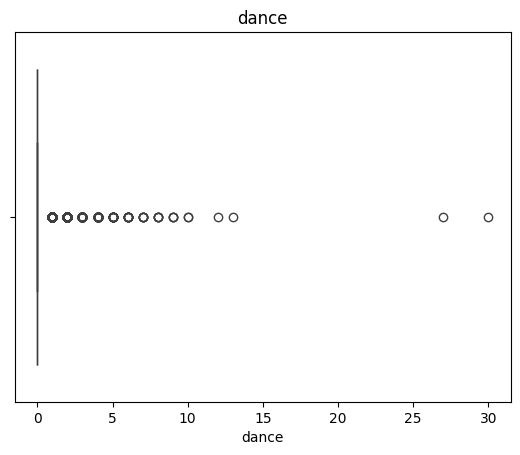

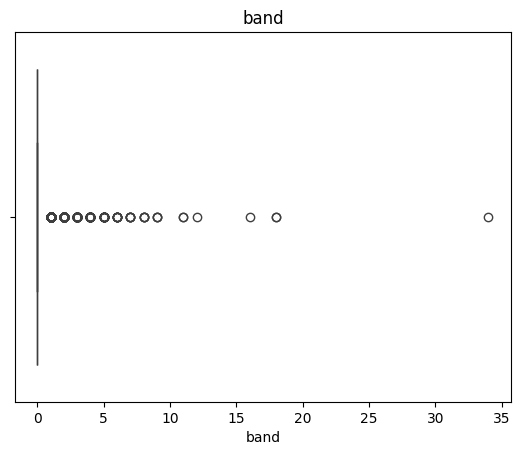

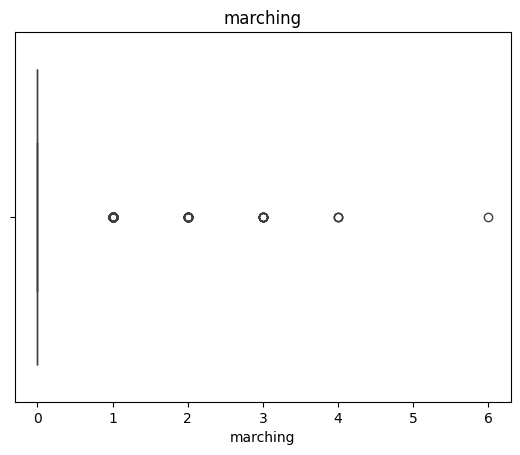

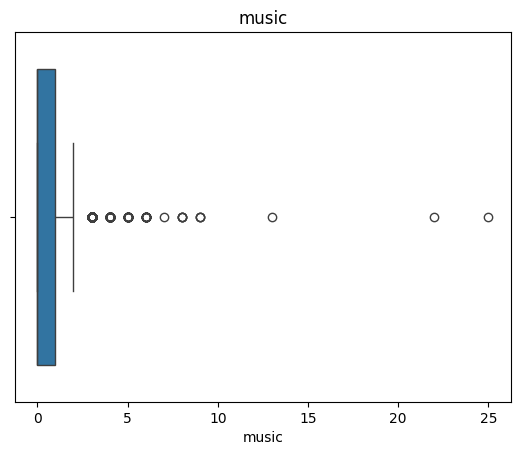

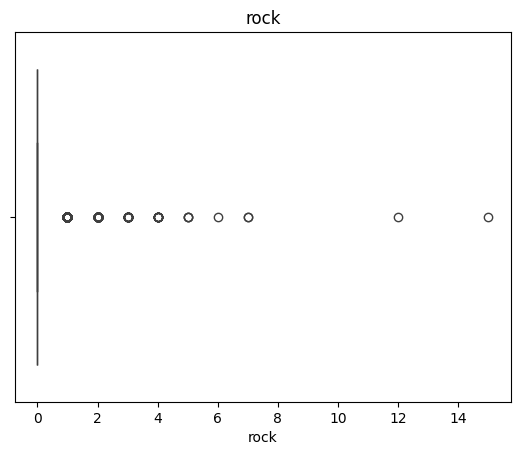

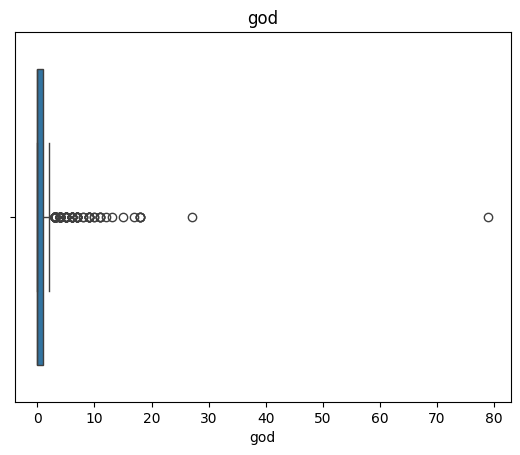

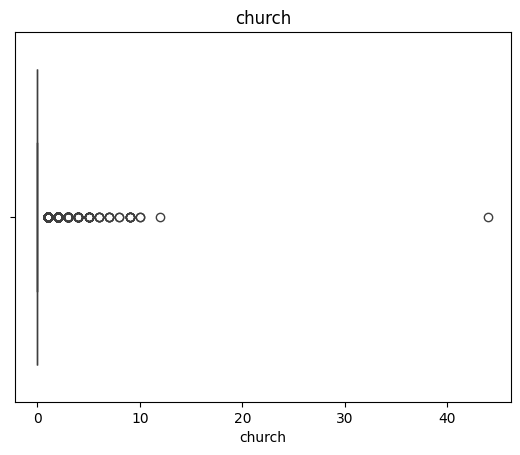

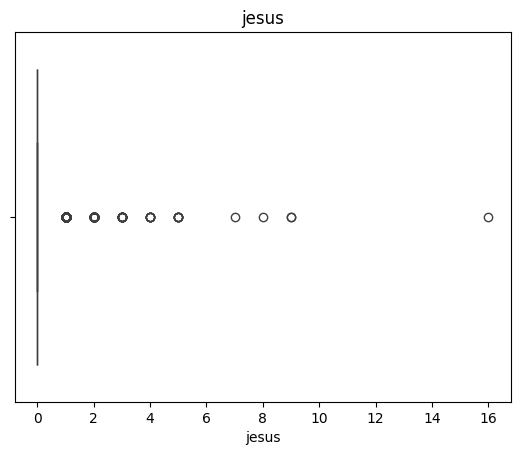

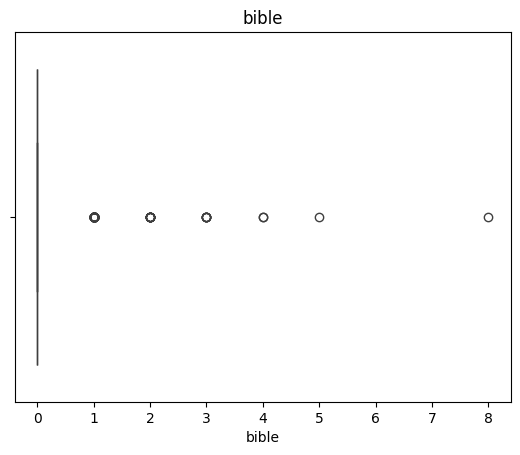

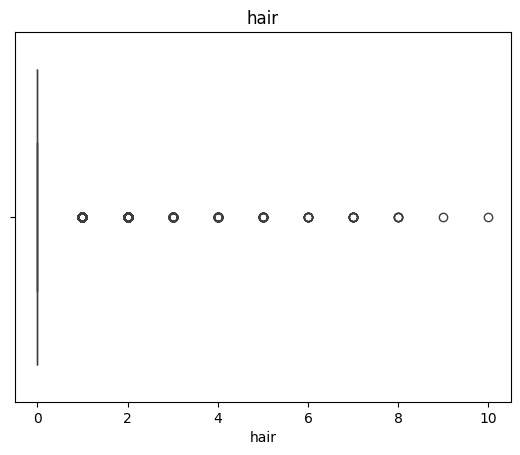

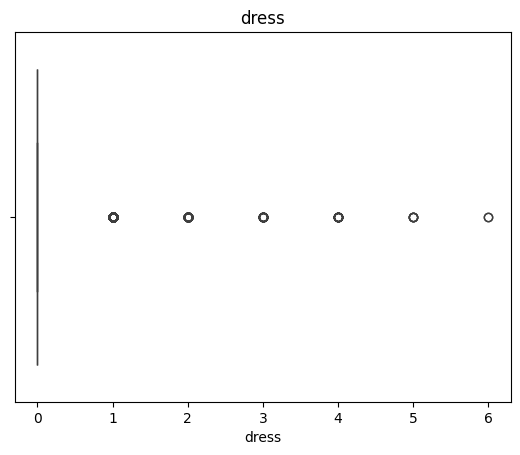

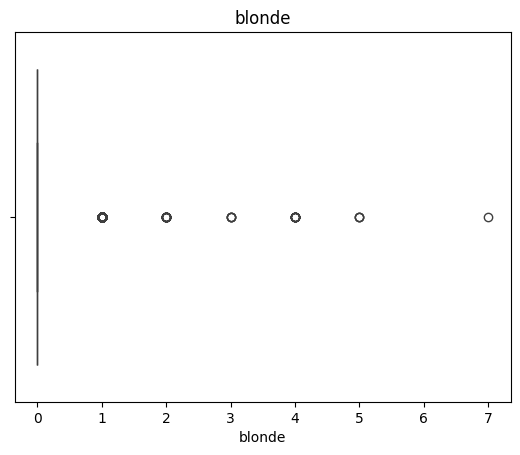

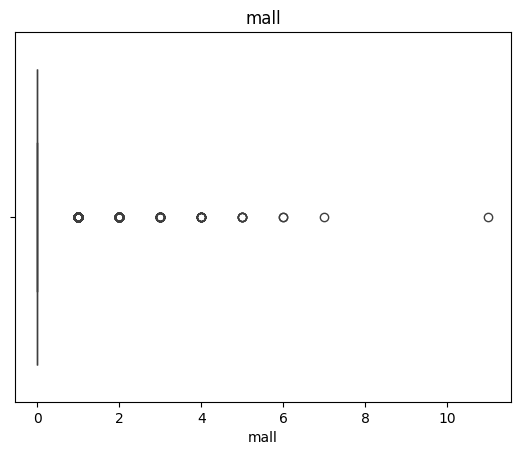

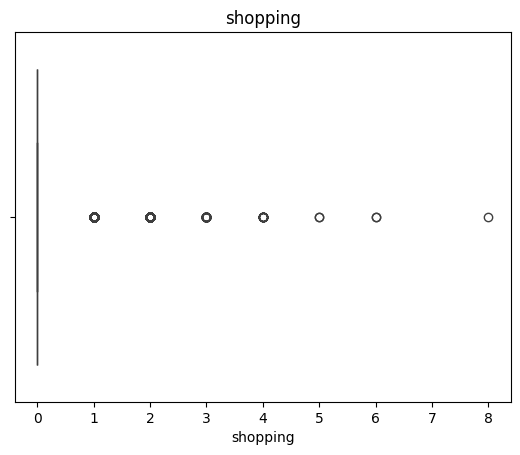

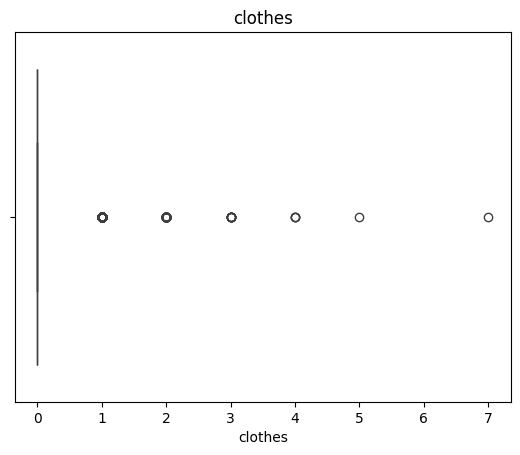

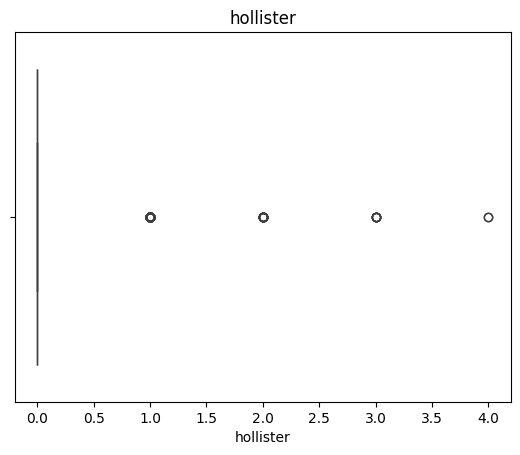

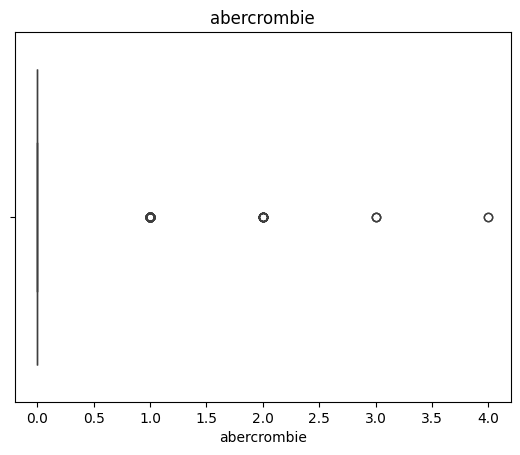

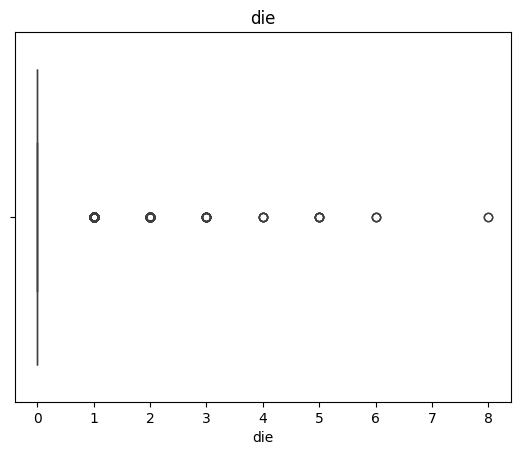

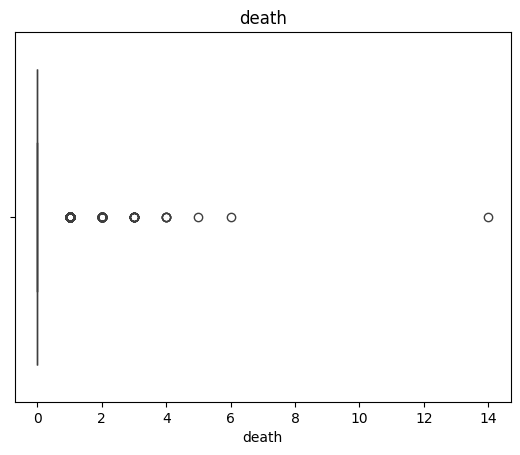

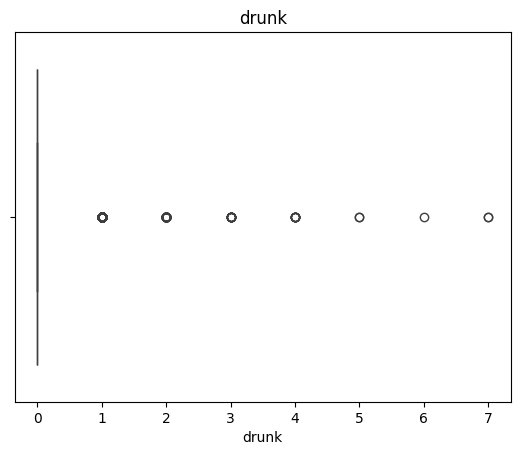

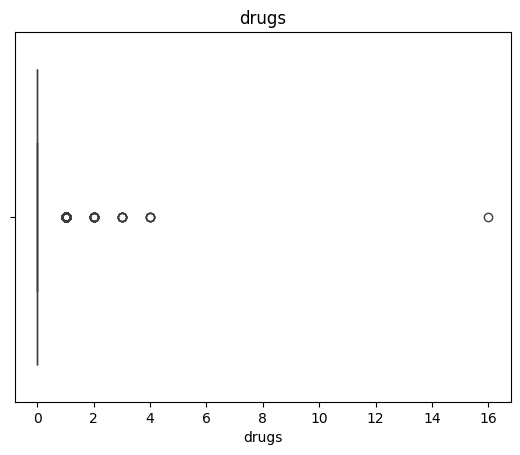

In [93]:
outliers(df)

In [94]:
df.describe()

,grad year,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,4436.0,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,...,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000
mean,2006.0,19.150054,26.876465,0.217538,0.235573,0.155320,0.108206,0.093778,0.104148,0.075744,...,0.061542,0.182822,0.317628,0.121506,0.041704,0.032913,0.155996,0.119702,0.106853,0.051623
std,0.0,5.943270,32.219772,0.769936,0.695099,0.709412,0.604765,0.500504,0.405120,0.446596,...,0.358564,0.587493,0.665033,0.413828,0.256278,0.221298,0.527497,0.467534,0.443760,0.363863
min,2006.0,5.194000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.0,18.420000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2006.0,18.776000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2006.0,19.150054,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2006.0,106.927000,373.000000,22.000000,10.000000,14.000000,12.000000,11.000000,7.000000,9.000000,...,7.000000,11.000000,8.000000,7.000000,4.000000,4.000000,8.000000,14.000000,7.000000,16.000000


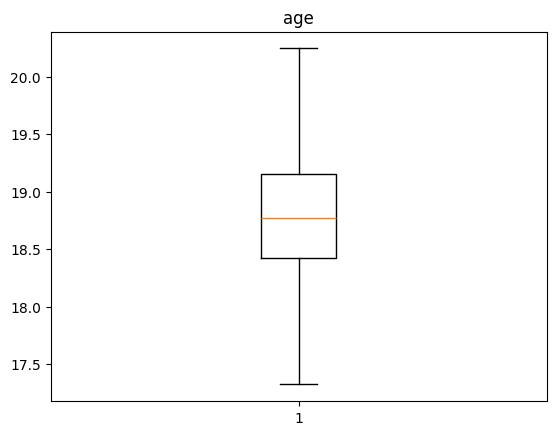

In [95]:
def cal_uf_lf(q1, q3):
    IQR = q3 - q1
    lf = q1 - (1.5 * IQR)
    uf = q3 + (1.5 * IQR)
    return [lf, uf]

def find_Q1_Q3(df, cols):
    lf_uf = {}
    for col in cols:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            lf_uf[col] = cal_uf_lf(q1, q3)
    return lf_uf

def remove_outliers(df, lf_uf):
    for col in lf_uf:
        lf, uf = lf_uf[col]
        if col=='age':
         df[col] = np.where(df[col] > uf, uf, df[col])
         df[col] = np.where(df[col] < lf, lf, df[col])
         plt.boxplot(df[col])
         plt.title(col)
         plt.show()

columns = df.columns.tolist()
uf_lf = find_Q1_Q3(df, columns)
remove_outliers(df, uf_lf)


In [96]:
df["age"] = round(df["age"])

In [97]:
km = KMeans()

In [99]:
df["gender"] = np.where(df["gender"] == "M",1,df["gender"])
df["gender"] = np.where(df["gender"] == "F",0,df["gender"])
df["gender"] = np.where(df["gender"] == "other",2,df["gender"])

In [100]:
km.fit(df)

KMeans()

In [101]:
km.inertia_

251171.59891653547

In [102]:
min = 10000000000000000000000
ind = -1
for i in range(20,40,2):
    km = KMeans(n_clusters=i)
    print("For clusters = ",i)
    km.fit(df)
    print(km.inertia_)
    if(km.inertia_ < min):
        min = km.inertia_
        ind = i
    print("")
print("Minimum inertia : ",min," at n_clusters ",ind)

For clusters =  20
103226.15020971885

For clusters =  22
98240.33517810228

For clusters =  24
92666.22684663587

For clusters =  26
87272.84393676145

For clusters =  28
87442.10888960843

For clusters =  30
81744.73112102845

For clusters =  32
79878.2494594958

For clusters =  34
78814.22530976852

For clusters =  36
76003.0493986949

For clusters =  38
73549.17478142146

Minimum inertia :  73549.17478142146  at n_clusters  38


In [103]:
for i in range(3, 15):
    kn = KMeans(n_clusters=i)
    kn.fit(df)
    print("n_clusters {} and inertia is {}".format(i, kn.inertia_))

n_clusters 3 and inertia is 1057576.8439529547
n_clusters 4 and inertia is 677833.16964448
n_clusters 5 and inertia is 494349.1879663323
n_clusters 6 and inertia is 368992.630905624
n_clusters 7 and inertia is 289661.17205232347
n_clusters 8 and inertia is 247465.59739695946
n_clusters 9 and inertia is 210728.29870872924
n_clusters 10 and inertia is 218240.89276869985
n_clusters 11 and inertia is 170826.7361596731
n_clusters 12 and inertia is 158477.23433460473
n_clusters 13 and inertia is 158152.0818268464
n_clusters 14 and inertia is 140492.21043792221


In [104]:
pd.DataFrame(km.labels_).value_counts()

0 
26    930
1     325
28    289
33    284
9     280
3     255
30    246
10    208
11    195
13    181
14    178
0     149
22    149
6     101
37     96
19     81
27     73
5      69
24     58
20     51
15     42
2      35
25     32
16     29
31     19
29     16
23     15
36     13
7      12
18      8
4       5
35      3
8       2
17      2
34      2
32      1
12      1
21      1
Name: count, dtype: int64

In [111]:
km = KMeans(n_clusters=4)
km.fit(df)
pd.DataFrame(km.labels_).value_counts()

0
2    2347
0    1419
3     567
1     103
Name: count, dtype: int64

In [106]:
km.inertia_

679317.3144570088

In [107]:
wcss = []
for i in range(3, 15):
    kn = KMeans(n_clusters=i)
    kn.fit(df)
    print("n_clusters {} and inertia is {}".format(i, kn.inertia_))
    wcss.append(kn.inertia_)

n_clusters 3 and inertia is 1057576.8439529547
n_clusters 4 and inertia is 677833.16964448
n_clusters 5 and inertia is 496861.75628191326
n_clusters 6 and inertia is 368992.6309056241
n_clusters 7 and inertia is 290548.5469574676
n_clusters 8 and inertia is 248508.7434153926
n_clusters 9 and inertia is 215432.52541041988
n_clusters 10 and inertia is 188298.4585851718
n_clusters 11 and inertia is 171557.50734042493
n_clusters 12 and inertia is 166538.77260830096
n_clusters 13 and inertia is 150299.6210349708
n_clusters 14 and inertia is 144519.0140950224


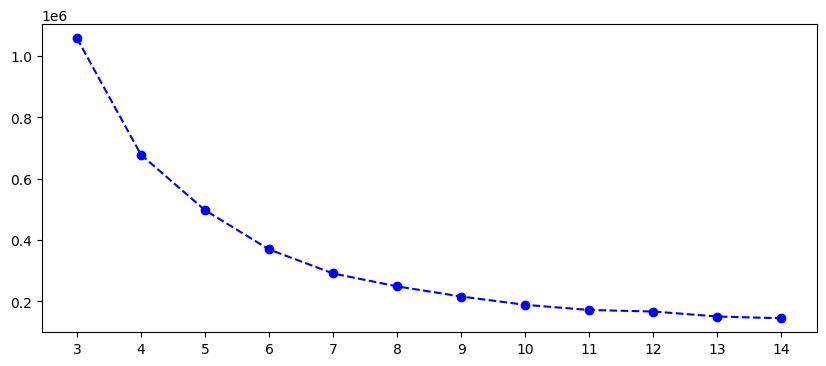

In [110]:
plt.figure(figsize=(10,4))
plt.plot(range(3, 15), wcss, "bo--")
plt.xticks(range(3, 15))
plt.show()

In [112]:
km = KMeans(n_clusters=5)
km.fit(df)
pd.DataFrame(km.labels_).value_counts()

0
0    1934
4    1355
2     765
1     321
3      61
Name: count, dtype: int64

In [113]:
km = KMeans(n_clusters=6)
km.fit(df)
pd.DataFrame(km.labels_).value_counts()

0
5    1860
1    1251
3     818
2     383
0     112
4      12
Name: count, dtype: int64

In [116]:
km = KMeans(n_clusters=7)
km.fit(df)
pd.DataFrame(km.labels_).value_counts()

0
1    1569
5    1017
4     869
0     566
2     300
3     103
6      12
Name: count, dtype: int64